# 🚗 Car Price Prediction Project

This notebook demonstrates a machine learning workflow to predict car prices based on historical data.


In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [3]:
# Step 2: Load Dataset
df = pd.read_csv('car_data_large.csv')  # Replace with your path
df.head()

,Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,Ford EcoSport,2020,18.05,11.16,1966,Petrol,Individual,Automatic,0
1,Toyota Innova,2015,2.32,6.47,147667,CNG,Individual,Automatic,2
2,Hyundai i20,2022,12.34,22.02,111019,Diesel,Dealer,Automatic,1
3,Ford EcoSport,2009,3.92,12.88,10630,Petrol,Individual,Manual,1
4,Honda City,2005,2.68,9.42,50913,Petrol,Individual,Manual,2


In [4]:
# Step 3: Data Info
df.info(
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           100 non-null    object 
 1   Year           100 non-null    int64  
 2   Selling_Price  100 non-null    float64
 3   Present_Price  100 non-null    float64
 4   Kms_Driven     100 non-null    int64  
 5   Fuel_Type      100 non-null    object 
 6   Seller_Type    100 non-null    object 
 7   Transmission   100 non-null    object 
 8   Owner          100 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 7.2+ KB


Name             0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

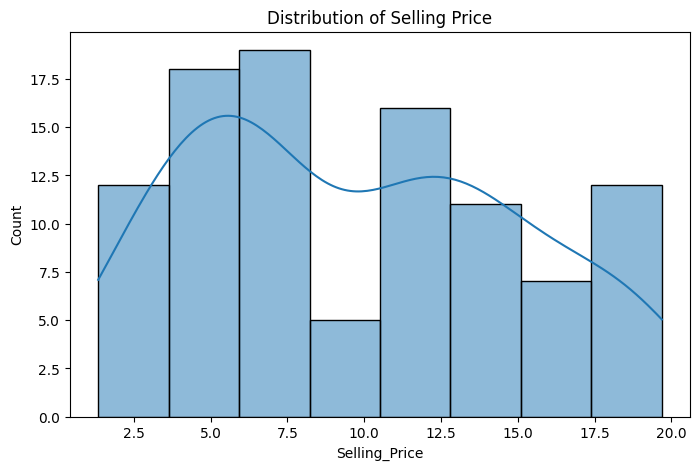

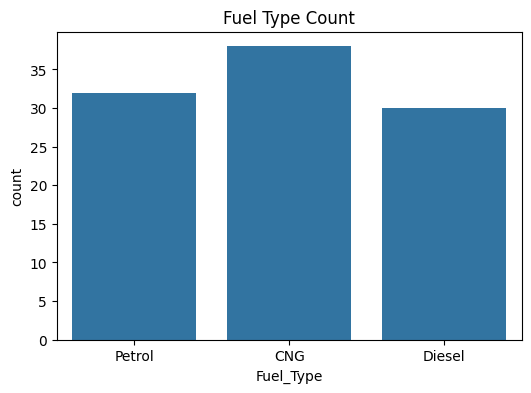

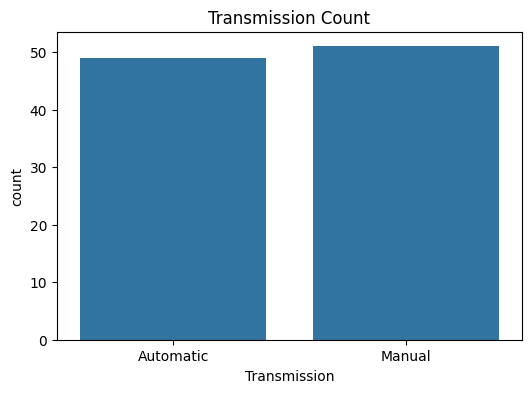

In [12]:
# Step 4: Exploratory Data Analysis
plt.figure(figsize=(8, 5))
sns.histplot(df['Selling_Price'], kde=True)
plt.title("Distribution of Selling Price")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Fuel_Type', data=df)
plt.title("Fuel Type Count")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Transmission', data=df)
plt.title("Transmission Count")
plt.show()


In [13]:
# Step 5: Encode Categorical Variables
df_encoded = df.copy()
le = LabelEncoder()

categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()


,Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,Ford EcoSport,2020,18.05,11.16,1966,2,1,0,0
1,Toyota Innova,2015,2.32,6.47,147667,0,1,0,2
2,Hyundai i20,2022,12.34,22.02,111019,1,0,0,1
3,Ford EcoSport,2009,3.92,12.88,10630,2,1,1,1
4,Honda City,2005,2.68,9.42,50913,2,1,1,2


In [15]:
# Step 6: Feature Selection & Splitting
X = df_encoded[['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
y = df_encoded['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Step 7: Model Train
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [17]:
# Step 8: Prediction and Evaluation
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R² Score: 0.049847173517835186
Mean Squared Error: 34.471777332215424


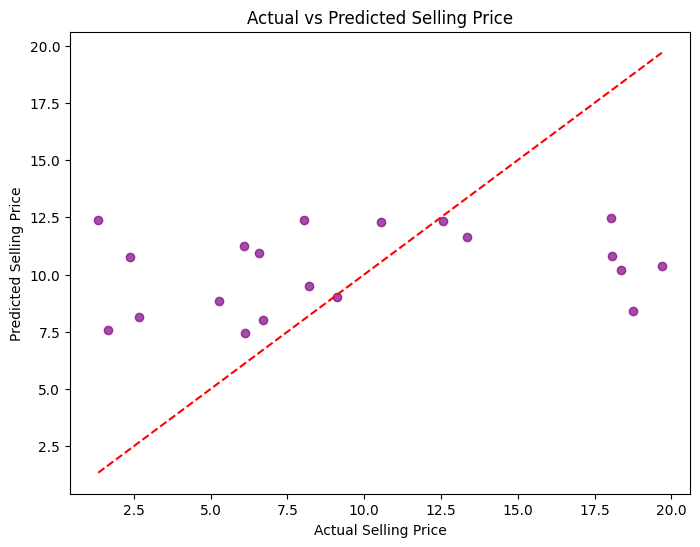

In [19]:
# Step 9: Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()
